In [12]:
#!pip install git+https://github.com/fabriziocosta/EDeN.git --user

In [1]:
%matplotlib inline

In [2]:
%%time
data_fname='bursi_neg_100_orig.smi'
data_fname='bursi_neg_100_merged_fragments.smi'

data_fname='bursi_pos_100_orig.smi'
data_fname='bursi_pos_100_merged_fragments.smi'

from eden.converter.molecule.obabel import mol_file_to_iterable
from eden.converter.molecule.obabel import obabel_to_eden
from itertools import tee, islice

def get_graphs(dataset_fname, size=None):
    iterable = mol_file_to_iterable(dataset_fname, file_format='smi')
    graphs = obabel_to_eden(iterable, file_format='smi')
    return islice(graphs,size)

graphs = get_graphs(data_fname)

CPU times: user 523 ms, sys: 93 ms, total: 616 ms
Wall time: 627 ms


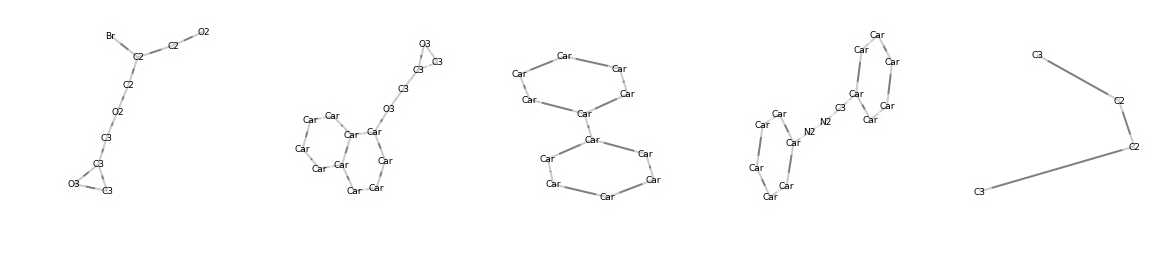

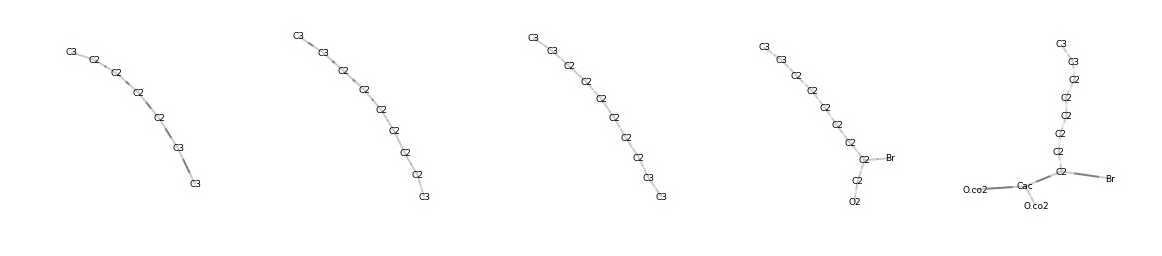

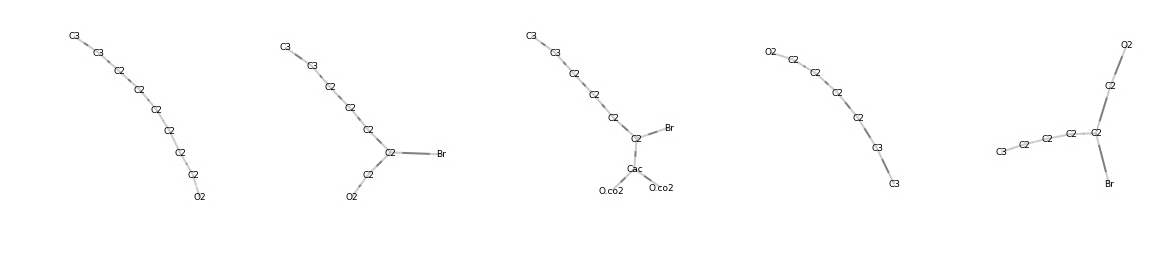

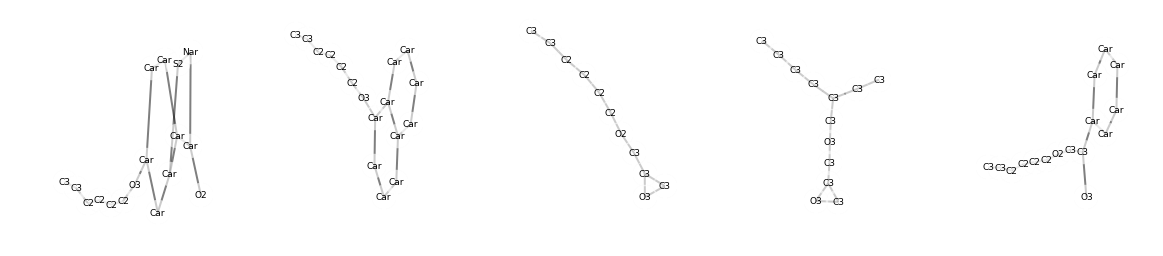

In [3]:
graphs,graphs_=tee(graphs)
from eden.util.display import draw_graph_set
draw_graph_set(islice(graphs_,20), n_graphs_per_line=5, size=4, edge_label=None)

In [16]:
graphs,graphs_=tee(graphs)
from eden.graph import Vectorizer
vec = Vectorizer(5)
X = vec.transform(graphs_)
from eden.util import describe
print describe(X)

Instances: 100 ; Features: 1048577 with an avg of 304 features per instance


In [17]:
from sklearn.metrics.pairwise import pairwise_kernels
K = pairwise_kernels(X, metric='linear')
print K

[[ 1.          0.05101231  0.         ...,  0.00462948  0.00772056
   0.06868208]
 [ 0.05101231  1.          0.37358323 ...,  0.57018705  0.18777428
   0.22184256]
 [ 0.          0.37358323  1.         ...,  0.42083721  0.15604269
   0.1247057 ]
 ..., 
 [ 0.00462948  0.57018705  0.42083721 ...,  1.          0.21441001
   0.19466518]
 [ 0.00772056  0.18777428  0.15604269 ...,  0.21441001  1.          0.38649774]
 [ 0.06868208  0.22184256  0.1247057  ...,  0.19466518  0.38649774  1.        ]]


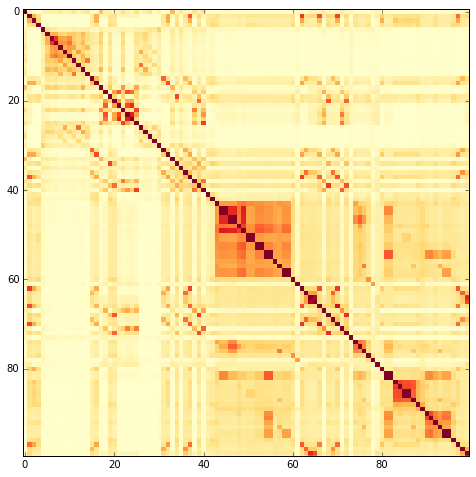

In [18]:
import pylab as plt
plt.figure(figsize=(8,8))
img = plt.imshow(K, interpolation='none', cmap=plt.get_cmap('YlOrRd'))
plt.show()

.